In [1]:
# Ali Can Şahin
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
# Veri Seti Yükleme
file_path = r"C:/Users/Selcuk.Karakus/Downloads/combined_wine_formatted_dataset.csv"
data = pd.read_csv(file_path)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7698 - loss: 0.5588 - val_accuracy: 0.8231 - val_loss: 0.4101
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.3909 - val_accuracy: 0.8208 - val_loss: 0.4044
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 0.3966 - val_accuracy: 0.8277 - val_loss: 0.3818
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8328 - loss: 0.3792 - val_accuracy: 0.8262 - val_loss: 0.3788
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8352 - loss: 0.3742 - val_accuracy: 0.8123 - val_loss: 0.3745
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8440 - loss: 0.3497 - val_accuracy: 0.8285 - val_loss: 0.3729
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8418 - loss: 0.3579 - val_accuracy: 0.8246 - val_loss: 0.3793
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8393 - loss: 0.3541 - val_accuracy: 0.

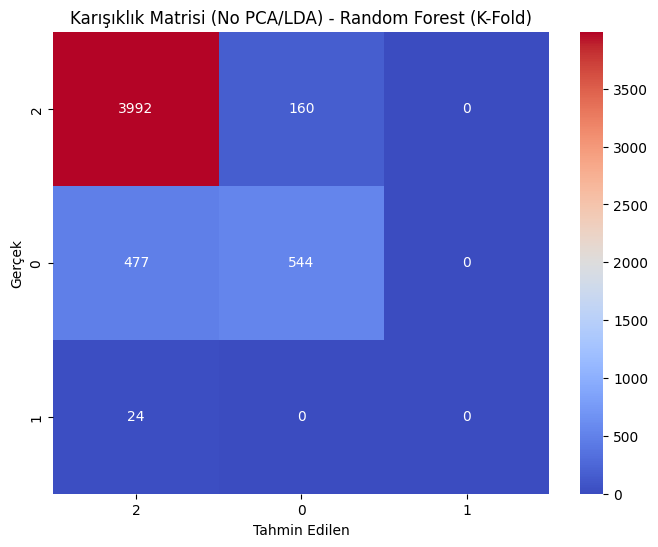

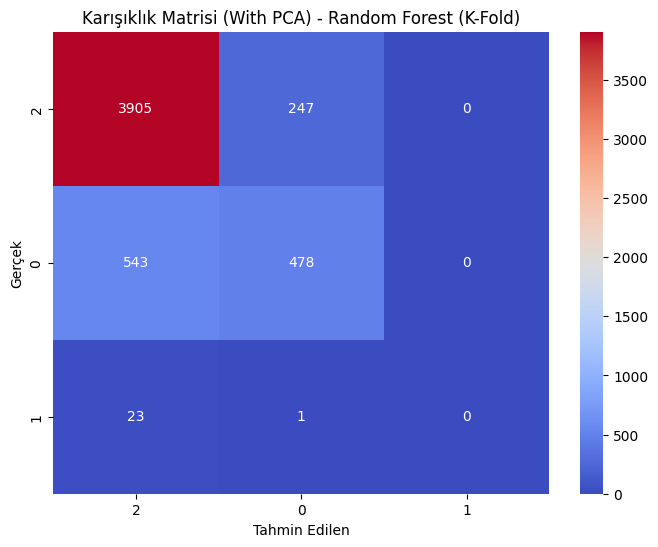

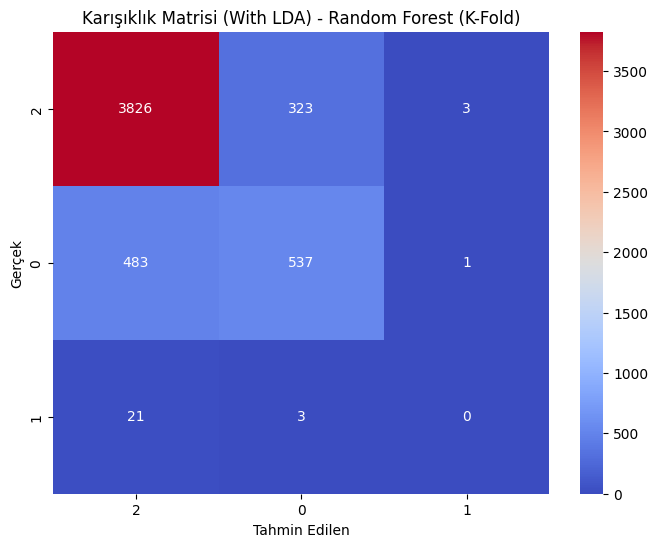

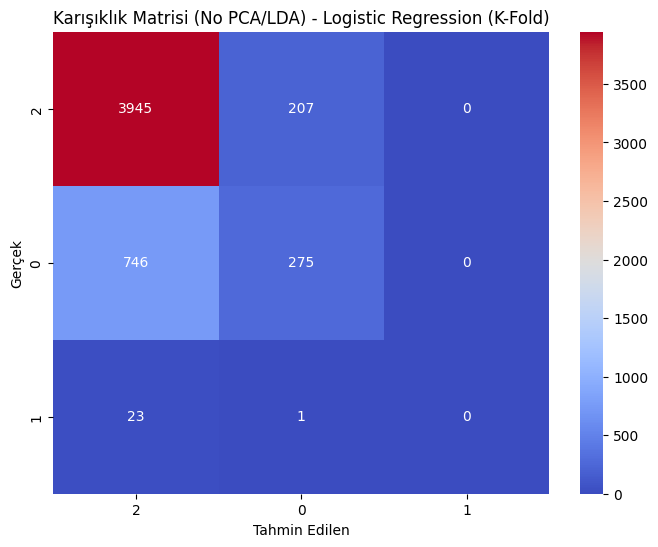

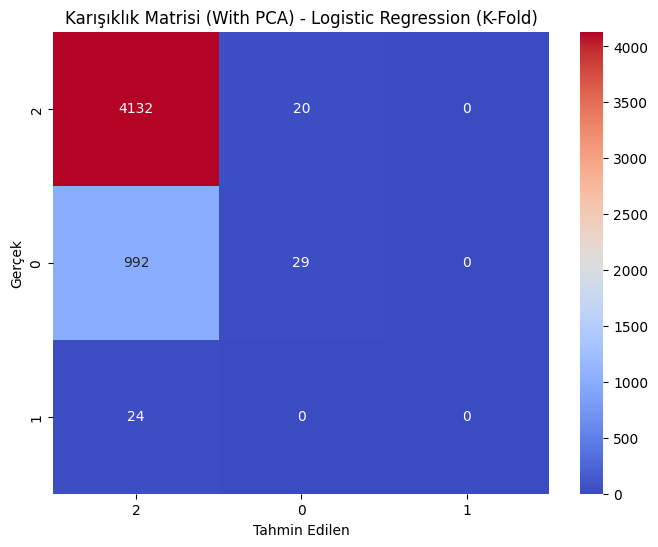

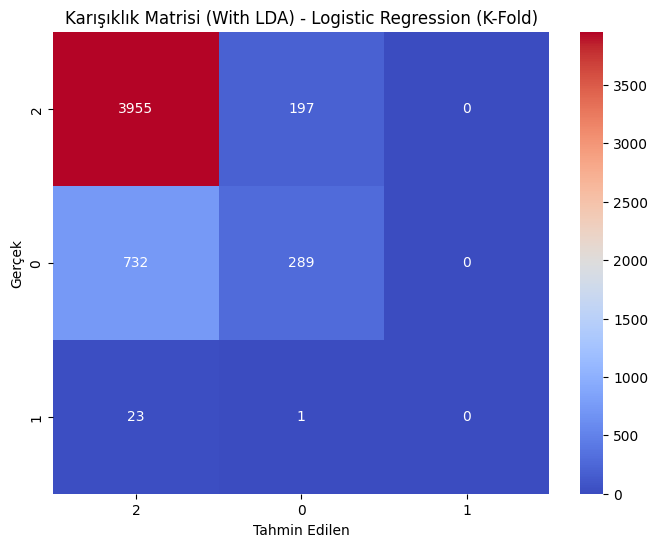

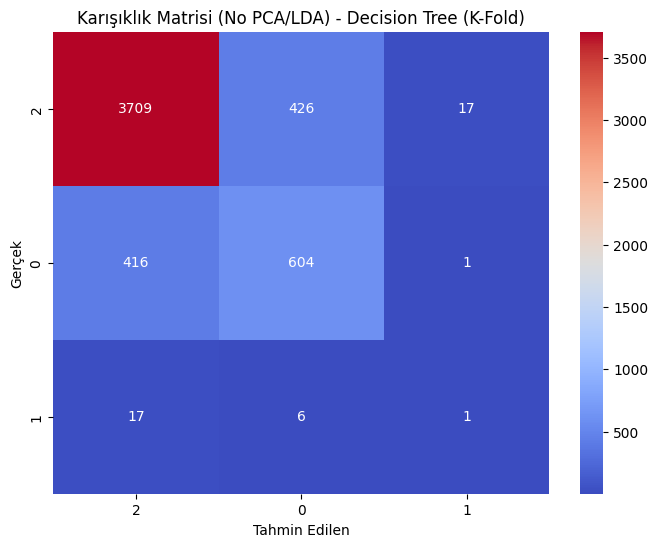

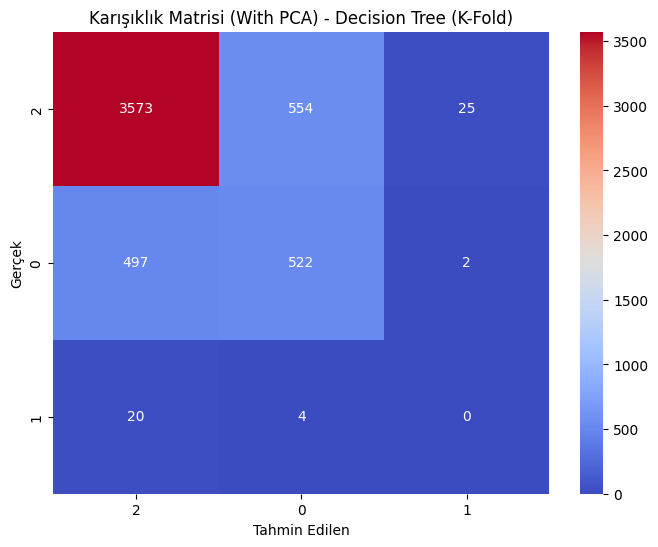

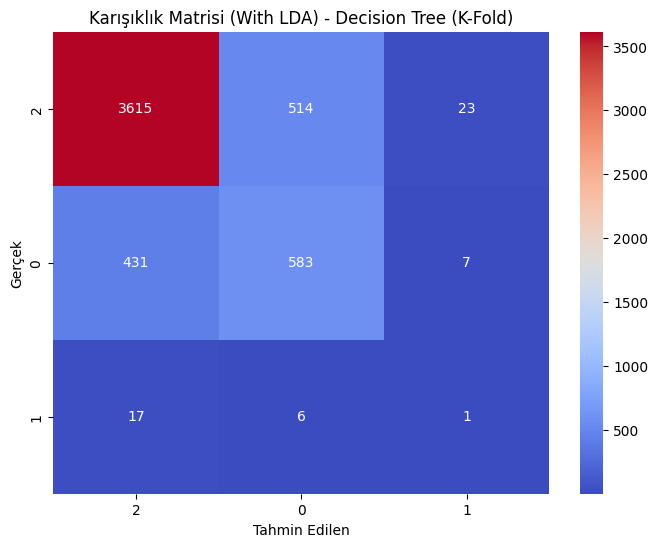

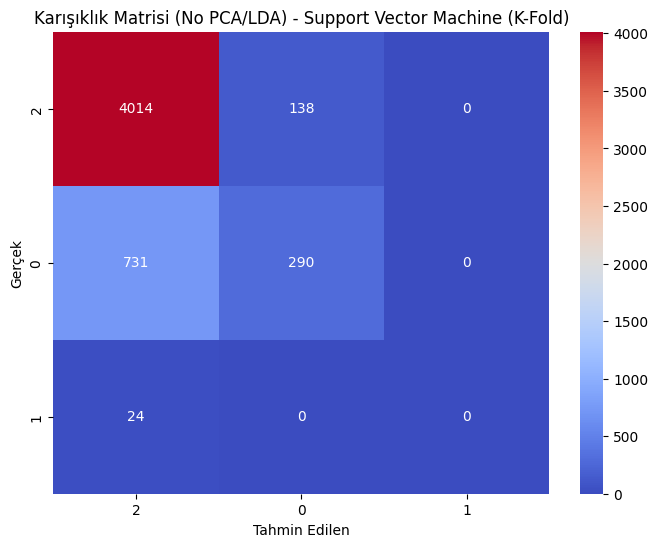

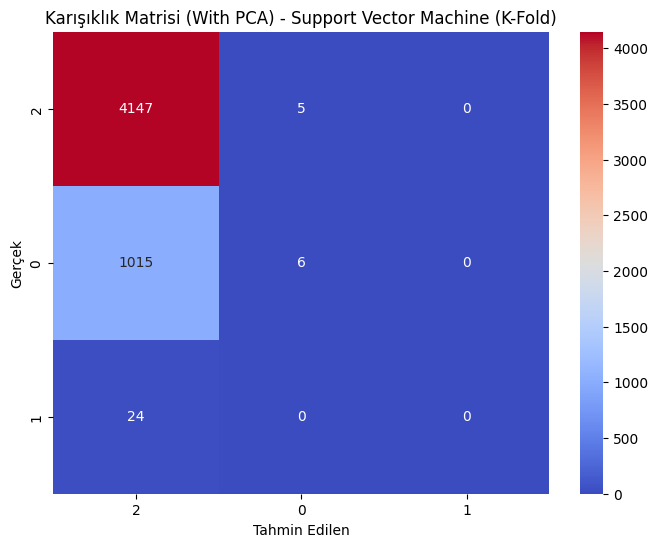

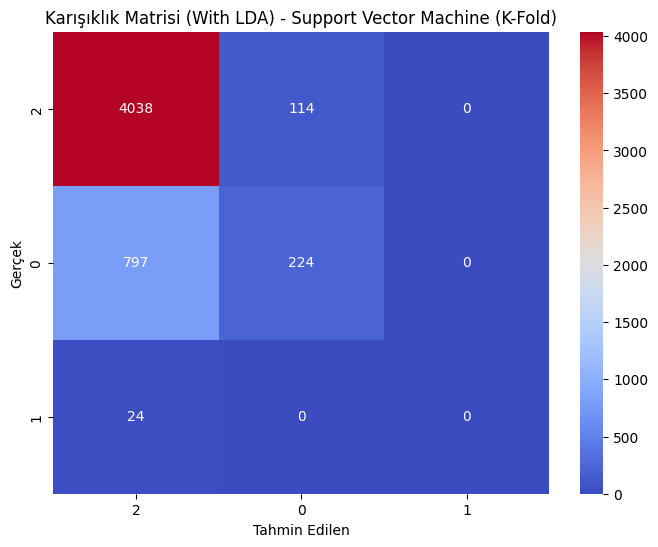

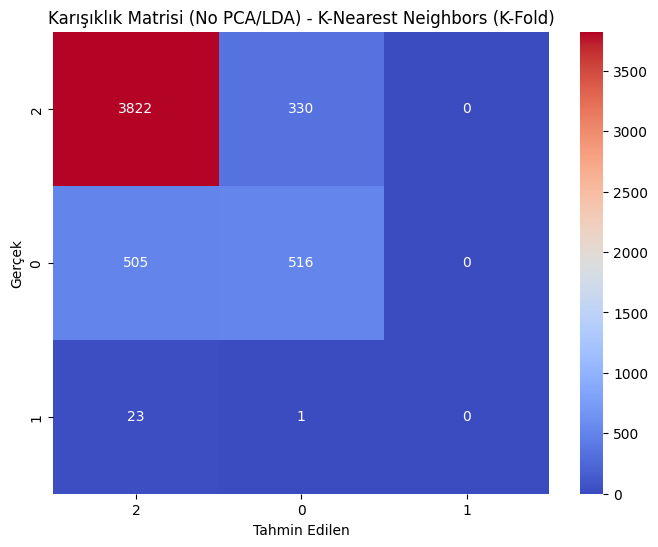

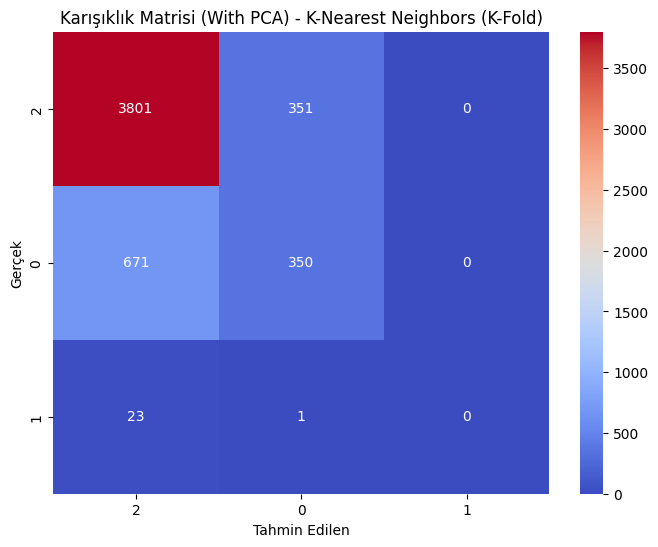

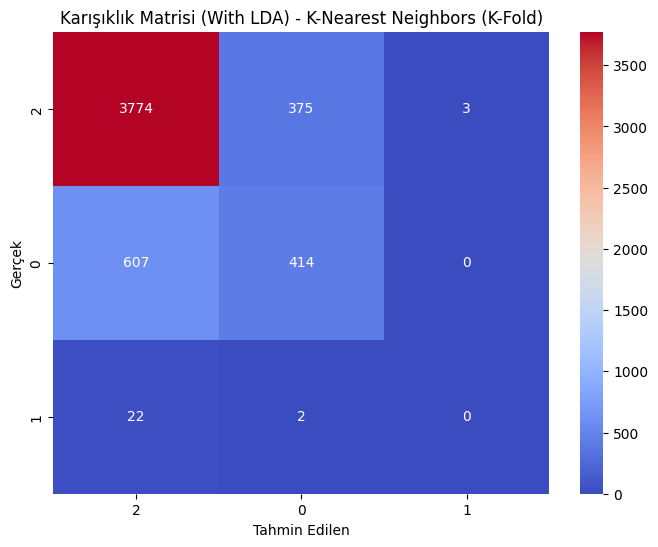

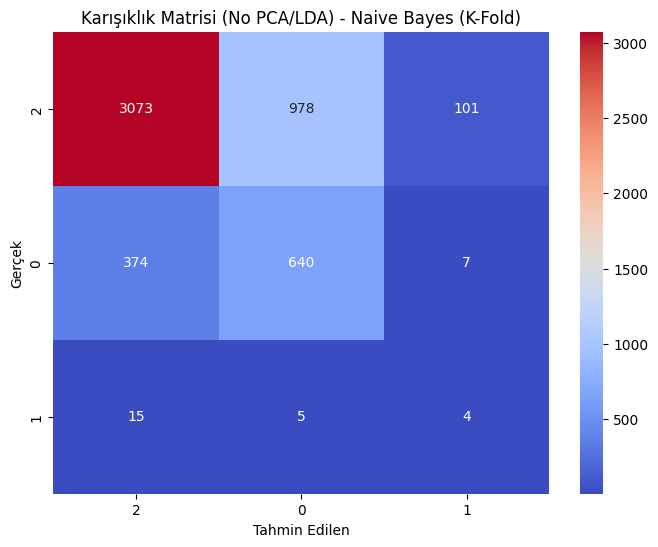

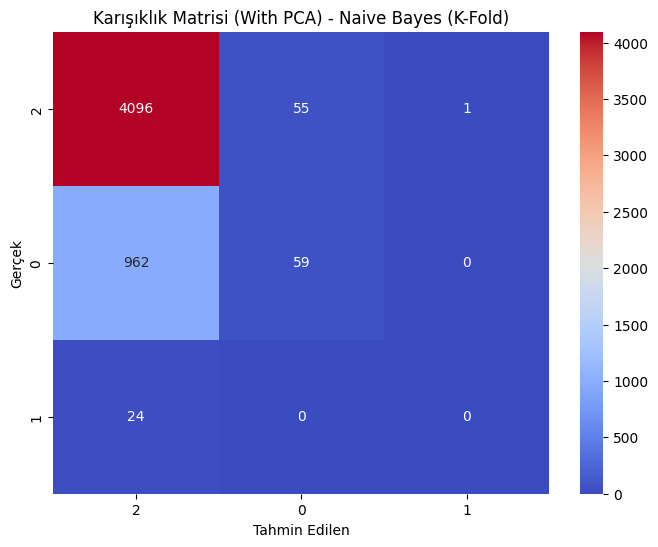

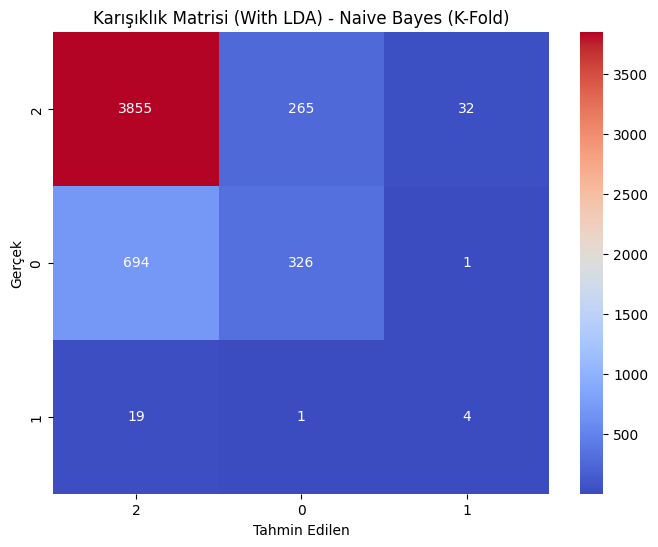

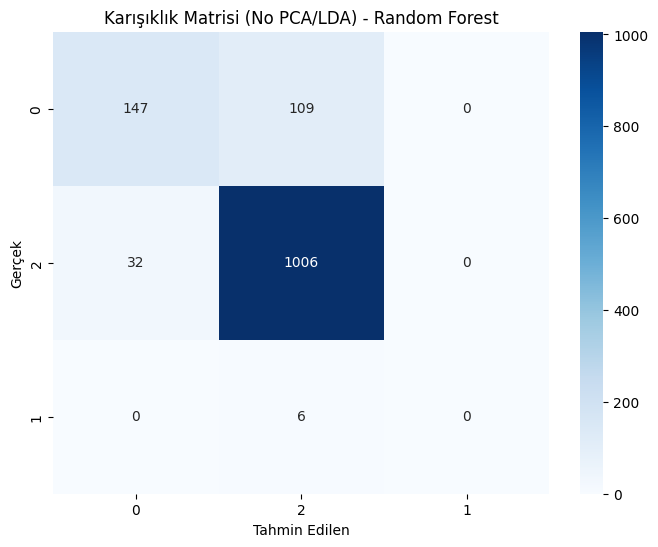

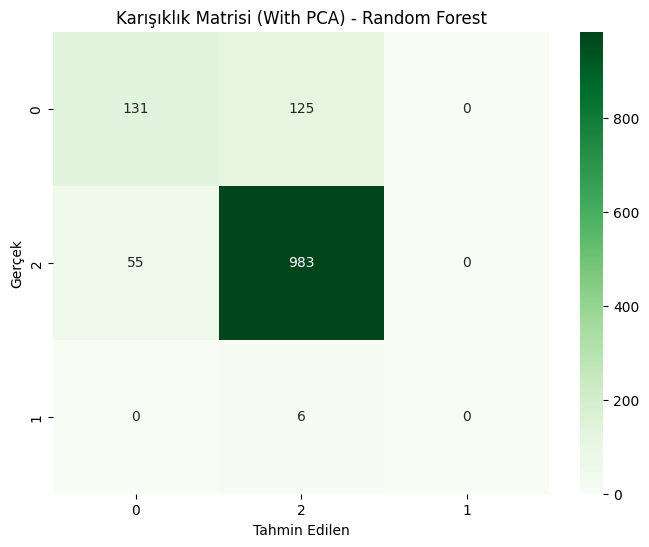

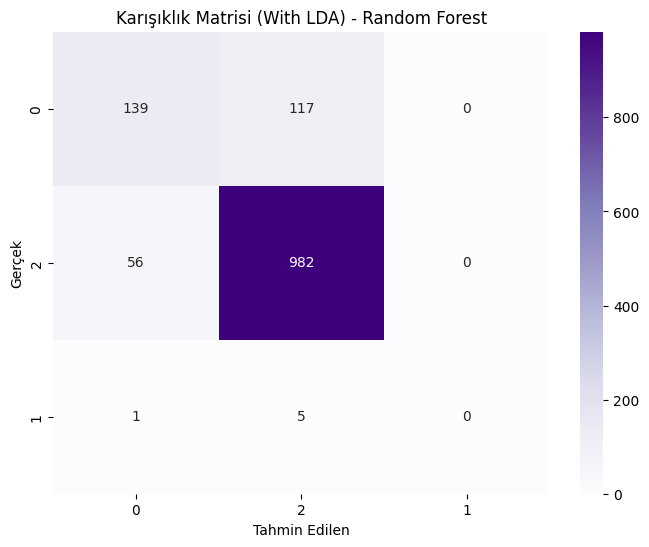

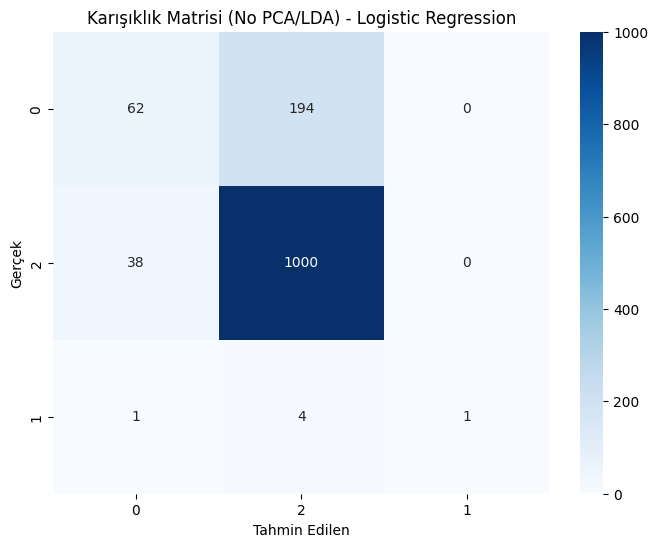

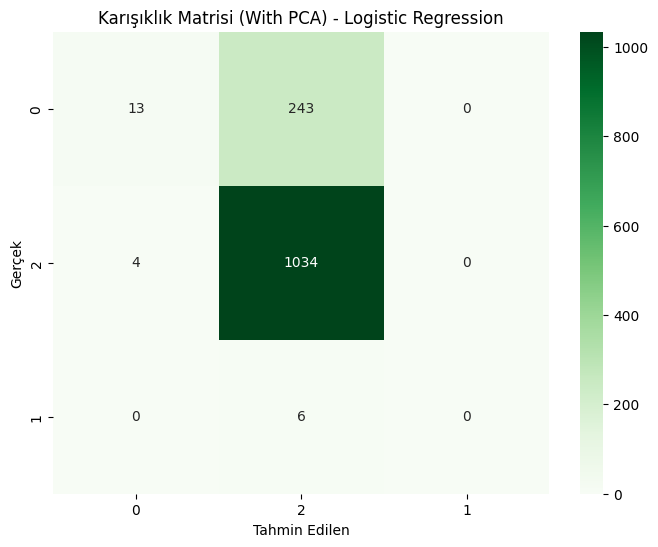

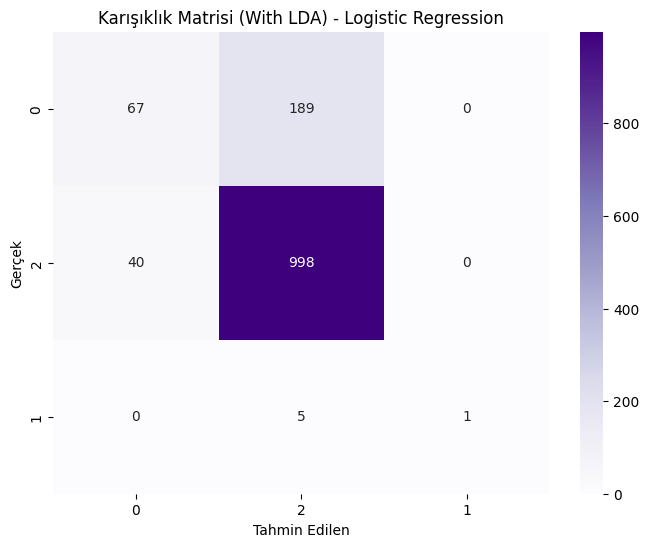

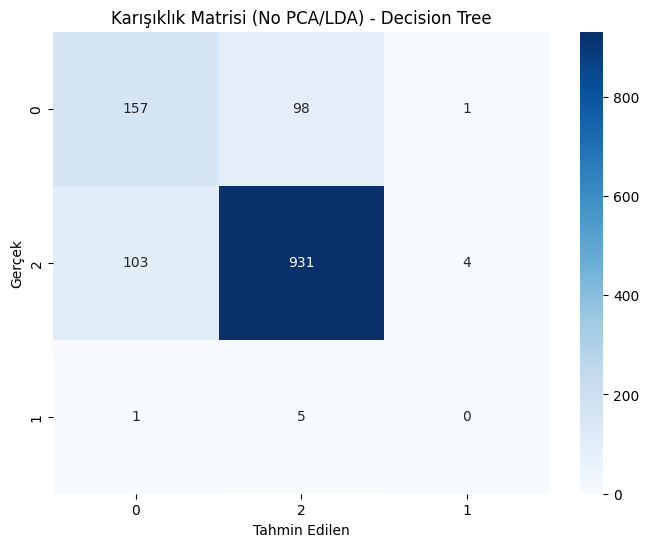

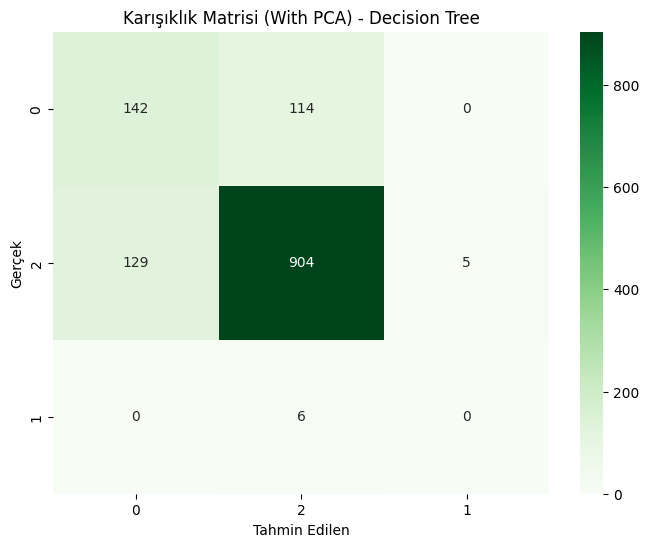

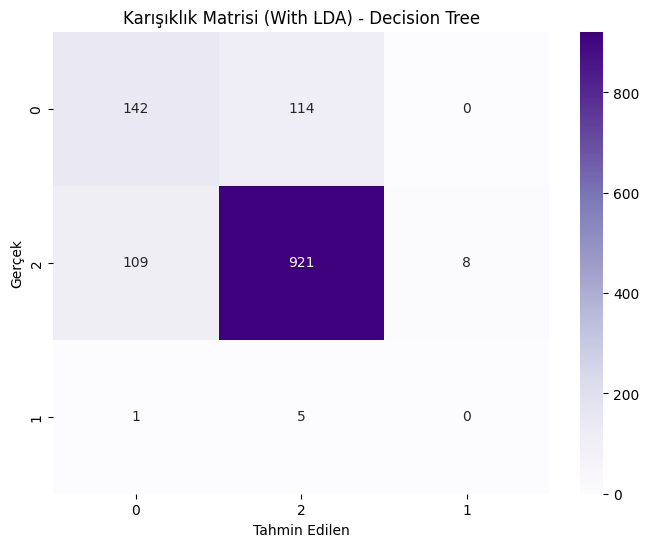

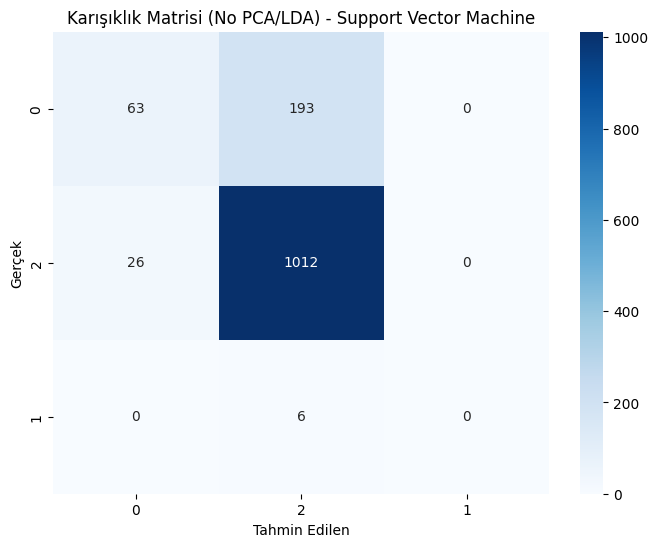

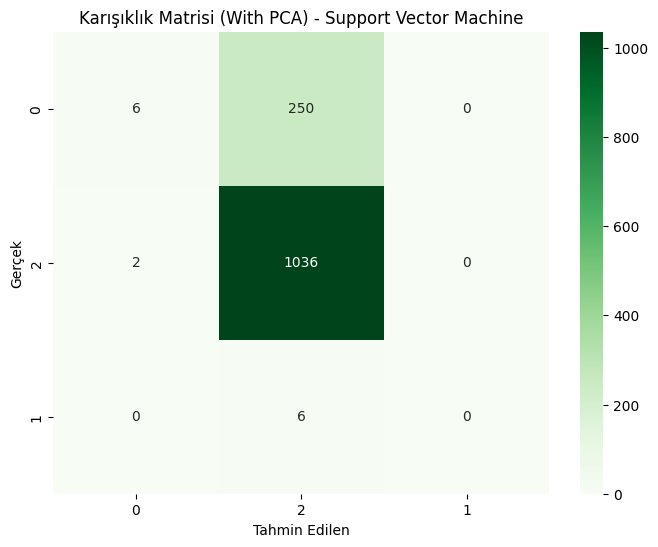

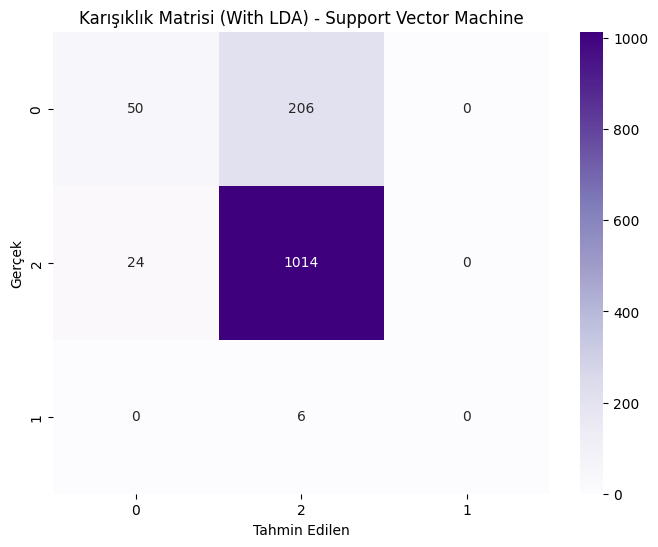

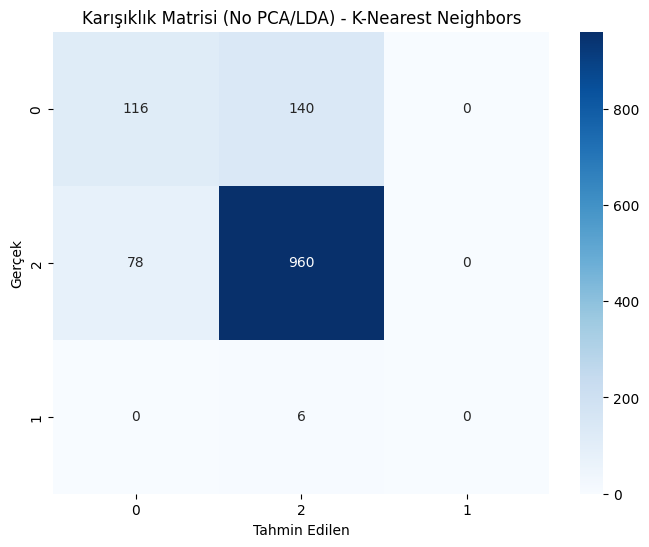

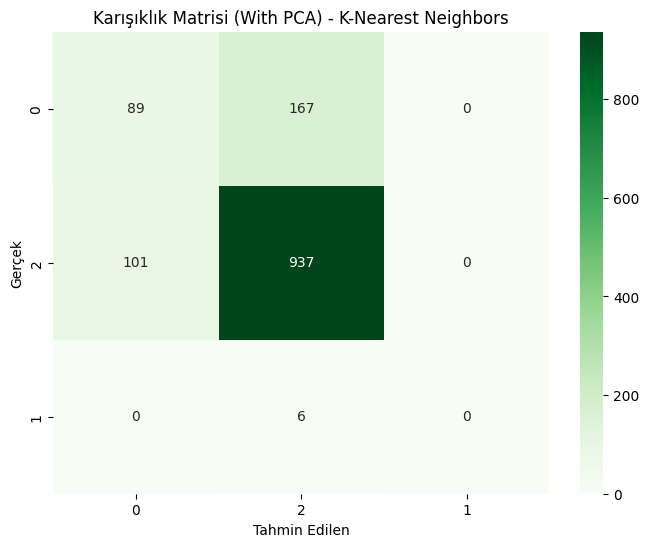

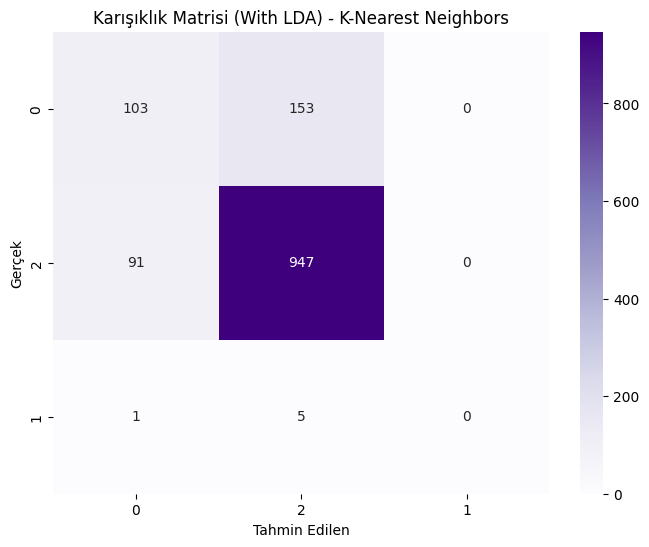

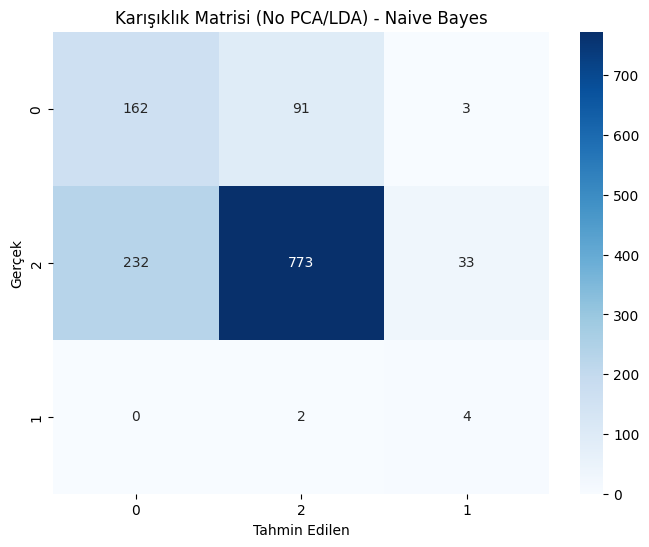

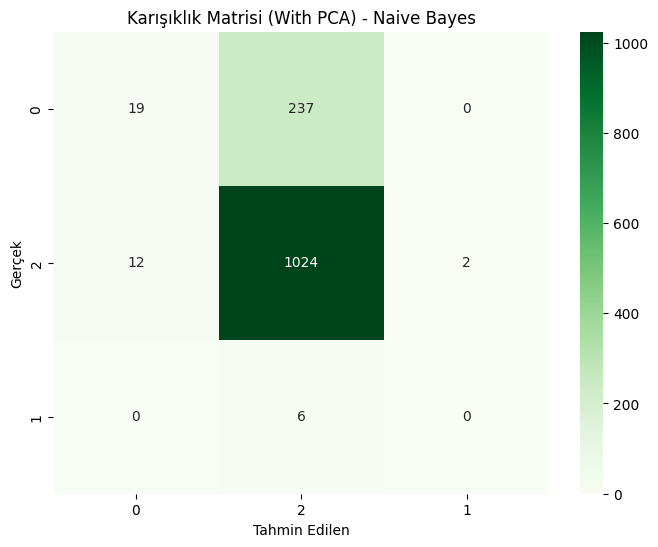

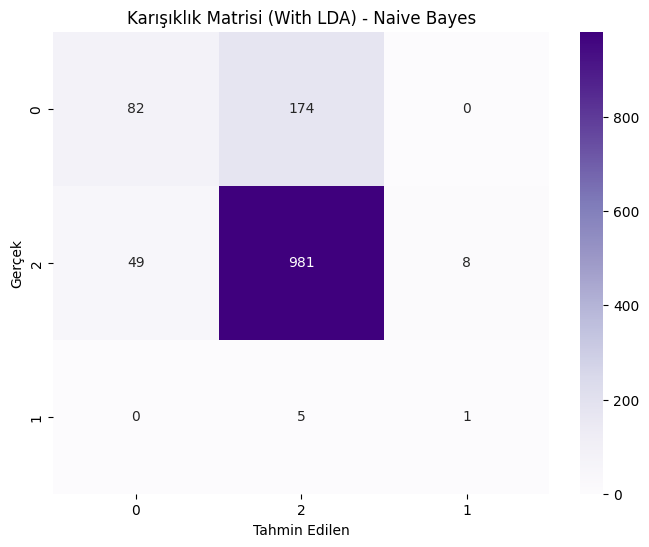

                     Model            Reduction  Accuracy  Precision  \
0                     FCNN           No PCA/LDA  0.827692   0.805938   
1                     FCNN             With PCA  0.805385   0.766663   
2                     FCNN             With LDA  0.817692   0.792035   
3                     FCNN  No PCA/LDA (K-Fold)  0.829322   0.820705   
4                     FCNN    With PCA (K-Fold)  0.797384   0.725675   
5                     FCNN    With LDA (K-Fold)  0.816820   0.791777   
6            Random Forest           No PCA/LDA  0.886923   0.878269   
7            Random Forest             With PCA  0.856923   0.843260   
8            Random Forest             With LDA  0.862308   0.849880   
9            Random Forest  No PCA/LDA (K-Fold)  0.872812   0.861663   
10           Random Forest    With PCA (K-Fold)  0.843370   0.827202   
11           Random Forest    With LDA (K-Fold)  0.839525   0.828449   
12     Logistic Regression           No PCA/LDA  0.817692   0.79

In [3]:
# Kategorik Sütunların Dönüştürülmesi
data_encoded = pd.get_dummies(data, columns=["type"], drop_first=True)

# Hedef Değişkenin Sayısal Değerlere Dönüştürülmesi
label_encoder = LabelEncoder()
data_encoded["quality_label"] = label_encoder.fit_transform(data_encoded["quality_label"])

# Özellik ve Hedef Değişkenlerin Ayrılması
X = data_encoded.drop(columns=["quality_label", "quality"])
y = data_encoded["quality_label"]

# Özelliklerin Ölçeklendirilmesi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve Test Setlerinin Oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Veri Türü Dönüşümleri
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

# PCA ve LDA Uygulaması
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Modellerin Tanımlanması
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Sonuçları Tutmak İçin Liste Oluşturulması
results = []

# FCNN Modelinin Tanımlanması
def create_fcnn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# FCNN Modeli için Eğitim ve Değerlendirme
fcnn_model = create_fcnn_model(X_train.shape[1])
history = fcnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# FCNN Performans Değerlendirmesi
y_pred_fcnn = np.argmax(fcnn_model.predict(X_test), axis=1)
y_pred_proba_fcnn = fcnn_model.predict(X_test)
auc_roc_fcnn = roc_auc_score(y_test, y_pred_proba_fcnn, multi_class='ovr')

# FCNN Sonuçlarının Eklenmesi
results.append({
    "Model": "FCNN",
    "Reduction": "No PCA/LDA",
    "Accuracy": accuracy_score(y_test, y_pred_fcnn),
    "Precision": precision_score(y_test, y_pred_fcnn, average="weighted", zero_division=0),
    "Recall": recall_score(y_test, y_pred_fcnn, average="weighted", zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_fcnn, average="weighted", zero_division=0),
    "AUC-ROC": auc_roc_fcnn
})

# FCNN'nin PCA ve LDA Durumlarının Değerlendirilmesi
for reduction, X_data, X_test_reduction in zip(["With PCA", "With LDA"], [X_train_pca, X_train_lda], [X_test_pca, X_test_lda]):
    fcnn_model_reduced = create_fcnn_model(X_data.shape[1])
    history = fcnn_model_reduced.fit(X_data, y_train, epochs=20, batch_size=32, validation_data=(X_test_reduction, y_test), verbose=1)

    y_pred_fcnn_reduced = np.argmax(fcnn_model_reduced.predict(X_test_reduction), axis=1)
    y_pred_proba_fcnn_reduced = fcnn_model_reduced.predict(X_test_reduction)
    auc_roc_fcnn_reduced = roc_auc_score(y_test, y_pred_proba_fcnn_reduced, multi_class='ovr')

    results.append({
        "Model": "FCNN",
        "Reduction": reduction,
        "Accuracy": accuracy_score(y_test, y_pred_fcnn_reduced),
        "Precision": precision_score(y_test, y_pred_fcnn_reduced, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred_fcnn_reduced, average="weighted", zero_division=0),
        "F1-Score": f1_score(y_test, y_pred_fcnn_reduced, average="weighted", zero_division=0),
        "AUC-ROC": auc_roc_fcnn_reduced
    })

# FCNN'nin K-Fold Değerlendirilmesi
for reduction, X_data, X_test_reduction in zip(["No PCA/LDA (K-Fold)", "With PCA (K-Fold)", "With LDA (K-Fold)"], [X_train, X_train_pca, X_train_lda], [X_test, X_test_pca, X_test_lda]):
    skf = StratifiedKFold(n_splits=5)
    fold_accuracy, fold_precision, fold_recall, fold_f1, fold_auc = [], [], [], [], []

    for train_index, test_index in skf.split(X_data, y_train):
        X_fold_train, X_fold_test = X_data[train_index], X_data[test_index]
        y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

        fcnn_model_kfold = create_fcnn_model(X_fold_train.shape[1])
        fcnn_model_kfold.fit(X_fold_train, y_fold_train, epochs=10, batch_size=32, verbose=0)

        y_fold_pred = np.argmax(fcnn_model_kfold.predict(X_fold_test), axis=1)
        y_fold_pred_proba = fcnn_model_kfold.predict(X_fold_test)
        auc_fold = roc_auc_score(y_fold_test, y_fold_pred_proba, multi_class="ovr")

        fold_accuracy.append(accuracy_score(y_fold_test, y_fold_pred))
        fold_precision.append(precision_score(y_fold_test, y_fold_pred, average="weighted", zero_division=0))
        fold_recall.append(recall_score(y_fold_test, y_fold_pred, average="weighted", zero_division=0))
        fold_f1.append(f1_score(y_fold_test, y_fold_pred, average="weighted", zero_division=0))
        fold_auc.append(auc_fold)

    results.append({
        "Model": "FCNN",
        "Reduction": reduction,
        "Accuracy": np.mean(fold_accuracy),
        "Precision": np.mean(fold_precision),
        "Recall": np.mean(fold_recall),
        "F1-Score": np.mean(fold_f1),
        "AUC-ROC": np.mean(fold_auc)
    })

# Modellerin PCA ve LDA'siz, PCA'lı ve LDA'lı Durumlarda Değerlendirilmesi
for model_name, model in models.items():
    # PCA ve LDA'siz
    model.fit(X_train, y_train)
    y_pred_no_reduction = model.predict(X_test)
    y_pred_proba_no_reduction = model.predict_proba(X_test) if hasattr(model, "predict_proba") else np.zeros((X_test.shape[0], len(np.unique(y_test))))
    auc_roc_no_reduction = roc_auc_score(y_test, y_pred_proba_no_reduction, multi_class="ovr")
    results.append({
        "Model": model_name,
        "Reduction": "No PCA/LDA",
        "Accuracy": accuracy_score(y_test, y_pred_no_reduction),
        "Precision": precision_score(y_test, y_pred_no_reduction, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred_no_reduction, average="weighted", zero_division=0),
        "F1-Score": f1_score(y_test, y_pred_no_reduction, average="weighted", zero_division=0),
        "AUC-ROC": auc_roc_no_reduction
    })

    # PCA'lı
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    y_pred_proba_pca = model.predict_proba(X_test_pca) if hasattr(model, "predict_proba") else np.zeros((X_test_pca.shape[0], len(np.unique(y_test))))
    auc_roc_pca = roc_auc_score(y_test, y_pred_proba_pca, multi_class="ovr")
    results.append({
        "Model": model_name,
        "Reduction": "With PCA",
        "Accuracy": accuracy_score(y_test, y_pred_pca),
        "Precision": precision_score(y_test, y_pred_pca, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred_pca, average="weighted", zero_division=0),
        "F1-Score": f1_score(y_test, y_pred_pca, average="weighted", zero_division=0),
        "AUC-ROC": auc_roc_pca
    })

    # LDA'lı
    model.fit(X_train_lda, y_train)
    y_pred_lda = model.predict(X_test_lda)
    y_pred_proba_lda = model.predict_proba(X_test_lda) if hasattr(model, "predict_proba") else np.zeros((X_test_lda.shape[0], len(np.unique(y_test))))
    auc_roc_lda = roc_auc_score(y_test, y_pred_proba_lda, multi_class="ovr")
    results.append({
        "Model": model_name,
        "Reduction": "With LDA",
        "Accuracy": accuracy_score(y_test, y_pred_lda),
        "Precision": precision_score(y_test, y_pred_lda, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred_lda, average="weighted", zero_division=0),
        "F1-Score": f1_score(y_test, y_pred_lda, average="weighted", zero_division=0),
        "AUC-ROC": auc_roc_lda
    })

    # K-Fold Cross Validation Uygulaması
    for reduction, X_data in zip(["No PCA/LDA", "With PCA", "With LDA"], [X_train, X_train_pca, X_train_lda]):
        skf = StratifiedKFold(n_splits=5)
        fold_accuracy, fold_precision, fold_recall, fold_f1, fold_auc = [], [], [], [], []
        fold_conf_matrix = np.zeros((len(y.unique()), len(y.unique())))

        for train_index, test_index in skf.split(X_data, y_train):
            X_fold_train, X_fold_test = X_data[train_index], X_data[test_index]
            y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

            model.fit(X_fold_train, y_fold_train)
            y_fold_pred = model.predict(X_fold_test)
            y_fold_pred_proba = model.predict_proba(X_fold_test) if hasattr(model, "predict_proba") else np.zeros((X_fold_test.shape[0], len(np.unique(y_test))))
            auc_fold = roc_auc_score(y_fold_test, y_fold_pred_proba, multi_class="ovr")

            fold_accuracy.append(accuracy_score(y_fold_test, y_fold_pred))
            fold_precision.append(precision_score(y_fold_test, y_fold_pred, average="weighted", zero_division=0))
            fold_recall.append(recall_score(y_fold_test, y_fold_pred, average="weighted", zero_division=0))
            fold_f1.append(f1_score(y_fold_test, y_fold_pred, average="weighted", zero_division=0))
            fold_auc.append(auc_fold)

            fold_conf_matrix += confusion_matrix(y_fold_test, y_fold_pred, labels=y.unique())

        results.append({
            "Model": model_name,
            "Reduction": reduction + " (K-Fold)",
            "Accuracy": np.mean(fold_accuracy),
            "Precision": np.mean(fold_precision),
            "Recall": np.mean(fold_recall),
            "F1-Score": np.mean(fold_f1),
            "AUC-ROC": np.mean(fold_auc)
        })

        # Karışıklık Matrisini Görselleştirme
        plt.figure(figsize=(8, 6))
        sns.heatmap(fold_conf_matrix.astype(int), annot=True, fmt='d', cmap='coolwarm', xticklabels=y.unique(), yticklabels=y.unique())
        plt.xlabel("Tahmin Edilen")
        plt.ylabel("Gerçek")
        plt.title(f"Karışıklık Matrisi ({reduction}) - {model_name} (K-Fold)")
        plt.show()

# Karışıklık Matrislerinin Görselleştirilmesi
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_no_reduction = model.predict(X_test)
    cm_no_reduction = confusion_matrix(y_test, y_pred_no_reduction, labels=y_test.unique())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_no_reduction, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.title(f"Karışıklık Matrisi (No PCA/LDA) - {model_name}")
    plt.show()

    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    cm_pca = confusion_matrix(y_test, y_pred_pca, labels=y_test.unique())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.title(f"Karışıklık Matrisi (With PCA) - {model_name}")
    plt.show()

    model.fit(X_train_lda, y_train)
    y_pred_lda = model.predict(X_test_lda)
    cm_lda = confusion_matrix(y_test, y_pred_lda, labels=y_test.unique())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Purples', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.title(f"Karışıklık Matrisi (With LDA) - {model_name}")
    plt.show()

# Değerlendirme Sonuçlarının Tabloya Dönüştürülmesi
results_df = pd.DataFrame(results)
print(results_df)
